# Examen parcial 4  $\color{red}{\text{(10p max)}}$ (Equaciones diferenciales)
* Antes de enviar el archivo, $\textbf{reiniciar y ejecutar el kernel}$ y ver que el archivo se compila sin errores
* enviar el archivo jupyter sin anexos antes de las 10.20am del 08.04.2022 a mi dirección de correo electrónico: michal.hemmerling@udea.edu.co 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy
import scipy.integrate

## Ejercicio 1. $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Transporte de calor en un objeto puede ser escrito usando segunda orden equacion diferencial:
$$\frac{d^2T}{dx^2}=0.01T-0.2$$
a) Usando `scipy.integrate.solve_bvp` resolver este equacion diferencial cumpliendo siguientes condiciones de limite:

T(x=0)=40  
T(x=10)=200

b) Hace grafico de T(x) vs x (con etiquietas y legend) 

In [2]:
from scipy.integrate import solve_bvp


## Ejercicio 2.  $\color{red}{\text{(4p)}}$ Ecuaciones diferenciales - problema de valor inicial (initial value problem).

La ley de Newton del enfriamiento tiene forma de ecuación diferencial

$$\frac{dy}{dt}=k(y-T_{amb}) $$


donde:
* y es la temperatura actual de un objeto
* t es tiempo
* k es un valor constante de enfriamiento
* $T_{amb}$ es la temperatura del ambiente

Digamos que una taza de café tiene una temperatura inicial de 90 centígrados y la temperatura ambiente es de 25 centígrados.

a) usando `scipy.integrate.solve_ivp` resolver ecuación diferencial:

* para el rango t: t=[0:60], [minutos] (use 100 puntos)
* asumir k=-0.06

b) Hace grafico de $y(t)$ vs $t$ (con leyenda)
* si le gusta tomar café cuando está a más de 70 grados, ¿cuál es el tiempo máximo que puede esperar antes de beber el café (puede obtener índices usando `np.argwhere` para obtener un rango de temperatura más preciso)

## Ejercicio 3.  $\color{red}{\text{(3p)}}$ Equaciones diferenciales - problema de valor de limite (boundary value problem).

Los organizadores de un espectáculo de fuegos artificiales quieren que los fuegos exploten a 40 metros sobre el suelo 5 segundos después del lanzamiento. Encuentra la velocidad inicial del cohete. 

a) usar ecuacion diferencial segunda orden:

$$\frac{d^2y}{dt^2}= −g $$

donde $y$ es altitud de cohete y,   

b) hacer plot $y(t)$ vs $t$


/usr/lib64/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


velocidad inicial:  [32.5]


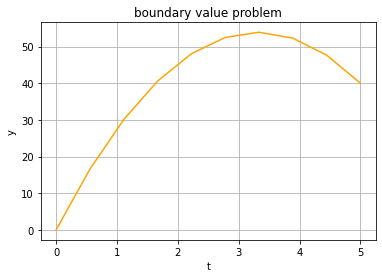

In [3]:

from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

y0 = 0
v=40
x = lambda t, s:np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)

t_span = np.linspace(0, 5, 100)
t_eval = np.linspace(0, 5, 10)

def cohete(v):
    sol = solve_ivp(x, [0, 5],[y0, v], t_eval = t_eval)
    y = sol.y[0]
    return y[-1] - 40

v = fsolve(cohete, 10)
sol = solve_ivp(x, [0, 5], [y0, v], t_eval = t_eval)

print("velocidad inicial: ",v)

plt.figure()
plt.plot(sol.t, sol.y[0], color="orange")

plt.xlabel('t')
plt.ylabel('y')
plt.title("boundary value problem")
plt.grid()

## Ejercicio 4 Ecuaciones diferenciales acopladas - problema de valor inicial `scipy.integrate.solve_ivp` $\color{red}{\text{(10p)}}$ o `otros metodos`  $\color{red}{\text{(7p)}}$

Las ecuaciones de Lotka-Volterra, también conocidas como ecuaciones depredador-presa, son un par de ecuaciones de primer orden, no lineales, ecuaciones diferenciales utilizadas con frecuencia para describir la dinámica de los sistemas biológicos en los que interactúan dos especies, uno como depredador y el otro como presa. Las poblaciones cambian a través del tiempo de acuerdo con el par de ecuaciones:

$$\frac{dx}{dt}=x(\color{red}{\alpha}-\color{red}{\beta} y)$$
$$\frac{dy}{dt}=-y(\color{red}{\gamma}-\color{red}{\delta} x)$$

Esa ecuación describiría la evolución de la población de conejos y zorros (condiciones perfectas)

* x - numbero de conejos  
* y - numbero de zorros

* $\color{red}{\alpha, \beta, \gamma, \delta }$ son parámetros que describen la interacción de las dos especies

* $\frac{dx}{dt}, \frac{dy}{dt}$ representan las tasas de crecimiento de las dos poblaciones a lo largo del tiempo

* $t$ es tiempo

a) solucionar los ecuaciones diferenciales usando `scipy.integrate.solve_ivp` $\color{red}{\text{(10p)}}$ o `otros metodos`  $\color{red}{\text{(7p)}}$
asumir: 
* $\alpha, \beta, \gamma, \delta = 1$
* $x_{ini}=4$
* $y_{ini}=2$
* $t=0:30$ (unidades arbitrarias, asumir meses)

b) hacer plot con dos curvas: $x$ vs. $t$ , $y$ vs. $t$   
c) hacer plot $x vs y$  
d) comentar sobre los dos plots  

In [4]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint


a= 1.0
b= 1.0
c= 1.0
d= 1.0
xi= 4.0
yi= 2.0
tm= 30.0 #meses
xyi = [xi, yi]  # Initial state of the system

def lotka(state, t):
  x= state[0]
  y= state[1]
  dx = x * (a- (b*y))
  dy = -y * (c-(d*x))
  return np.array([dx, dy])

nt=1000
t = np.linspace(0, 30, 100)
r= odeint(lotka, xyi, t)

x=r.T[0]
y=r.T[1]





<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

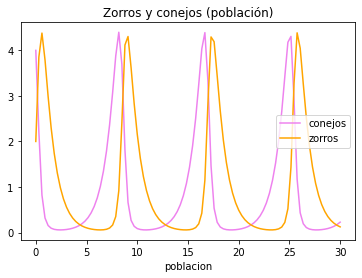

In [5]:
plt.figure()
plt.title("Zorros y conejos (población)")
plt.plot(t, x, color="violet", label="conejos")
plt.plot(t, y, color="orange", label="zorros")
plt.xlabel("poblacion")
plt.legend()
plt.grid

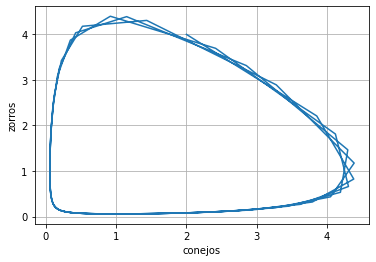

In [6]:
plt.figure()
plt.plot(y,x)
plt.xlabel('conejos')
plt.ylabel('zorros')
plt.grid()


# Feedback:
```
Exercise 1.
Solution + presentation of the results	            (max 3.0p):	0.0p

Exercise 2.
Solution + presentation of the results	            (max 4.0p):	0.0p

Exercise 3.
Solution + presentation of the results	            (max 3.0p):	3.0p

Exercise 4 ODEINT.
Solution + presentation of the results	            (max 7.0p):	5.0p
  x= state[0]
  y= state[1]
yo lo corregi

Exercise 4 IVP.
Solution + presentation of the results	            (max 10.0p):  00.0p



- Total:                                              (max 10.0p):   8.0p
```